In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.stats import *

In [83]:
ciclo='secundaria'
pathDataAprender='./data/aprender2016/'
fn=os.path.join(pathDataAprender,'aprender_2016_'+ciclo+'.csv.zip')
df_aprender=pd.read_csv(fn,compression='zip')

In [84]:
df_aprender.head()

,id_unidad_educativa,sexo,indice_socioeconomico_alumno,nivel_educativo_madre,nivel_educativo_padre,repitencia_primaria,repitencia_secundaria,desepeno_lengua,desepeno_matematica,desepeno_ciencias_sociales,desepeno_ciencias_naturales,ponderador_lengua,ponderador_matematica,ponderador_ciencias_sociales,ponderador_ciencias_naturales
0,999912345700,m,NaN,No terminó la escuela primaria,Tiene estudios terciarios,Nunca,Tres veces o más,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,999912345700,m,NaN,Terminó la escuela primaria,Terminó la escuela primaria,Nunca,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,999912345700,m,NaN,7.0,7.0,Nunca,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,999912345700,m,NaN,Terminó la escuela secundaria,7.0,Nunca,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,999912345700,m,NaN,Terminó la escuela primaria,Terminó la escuela secundaria,Nunca,Dos veces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_aprender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331852 entries, 0 to 331851
Data columns (total 15 columns):
id_unidad_educativa              331852 non-null int64
sexo                             259567 non-null object
indice_socioeconomico_alumno     300194 non-null object
nivel_educativo_madre            306915 non-null object
nivel_educativo_padre            295393 non-null object
repitencia_primaria              308005 non-null object
repitencia_secundaria            307476 non-null object
desepeno_lengua                  258092 non-null object
desepeno_matematica              278000 non-null object
desepeno_ciencias_sociales       271064 non-null object
desepeno_ciencias_naturales      248002 non-null object
ponderador_lengua                258092 non-null float64
ponderador_matematica            278000 non-null float64
ponderador_ciencias_sociales     271064 non-null float64
ponderador_ciencias_naturales    248002 non-null float64
dtypes: float64(4), int64(1), object(10)
memor

In [86]:
#show unique values in a column
df_aprender.desepeno_matematica.unique()

array([nan, 'Satisfactorio', 'Básico', 'Por debajo del Nivel Básico',
       'Avanzado'], dtype=object)

In [88]:
#df.desepeno_matematica.isnull().any()

print("Cantidad alumnos evaluados APRENDER 2016: {0}".format(len(df)))
print("Cantidad alu CON desempeño matemática : {0}".format(df.desepeno_matematica.count()))
print("Cantidad alu SIN desempeño matemática : {0}".format(len(df) - df.desepeno_matematica.count()))


df_con_mat=df.dropna(subset=['desepeno_matematica'])
cant_total_mat=len(df_con_mat)

cant_mat_masc=len(df_con_mat[df_con_mat.sexo=='m'])
cant_mat_fem=len(df_con_mat[df_con_mat.sexo=='f'])

df_sexo=df_con_mat.dropna(subset=['sexo'])

print("Cantidad que informaron su sexo: {}".format(cant_mat_masc+cant_mat_fem))
print("Cantidad que NO informaron su sexo: {}".format(cant_total_mat-(cant_mat_masc+cant_mat_fem)))

print("Mujeres matematica: {0}".format(cant_mat_fem))
print("Hombres matematica: {0}".format(cant_mat_masc))
print("Porcentaje mujeres con calif matemática: {0}".format(cant_mat_fem*100/(cant_mat_masc+cant_mat_fem)))
print("Porcentaje hombres con calif matemática: {0}".format(cant_mat_masc*100/(cant_mat_masc+cant_mat_fem)))

Cantidad alumnos evaluados APRENDER 2016: 331852
Cantidad alu CON desempeño matemática : 278000
Cantidad alu SIN desempeño matemática : 53852
Cantidad que informaron su sexo: 225360
Cantidad que NO informaron su sexo: 52640
Mujeres matematica: 126138
Hombres matematica: 99222
Porcentaje mujeres con calif matemática: 55.97177848775293
Porcentaje hombres con calif matemática: 44.02822151224707


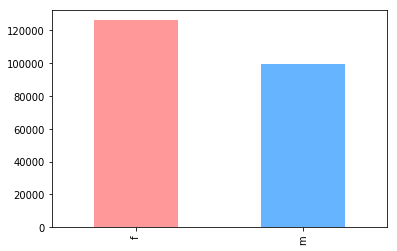

In [89]:
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
df_con_mat["sexo"].value_counts().plot.bar(color=colors)
plt.show()

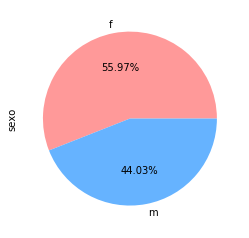

In [90]:
df_con_mat["sexo"].value_counts().plot.pie(colors=colors, autopct='%.2f%%') #labels=['masculino','femino']
plt.gca().set_aspect("equal")

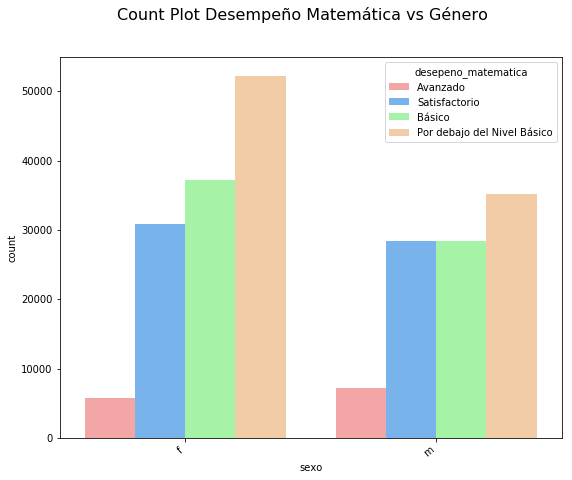

In [91]:
data=df_sexo
dg=data.groupby(['desepeno_matematica','sexo'])[['desepeno_matematica','sexo']].count()
dg.head(40)


def count_plot_together(fig_size_x, fig_size_y, x_axis, hue, df, title="", hue_order=[] ):    
    plt.figure(figsize=(fig_size_x,fig_size_y))
    ax = sns.countplot(x=x_axis, hue=hue, data=df, hue_order=hue_order, palette=colors)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    plt.suptitle(title, size = 16);
    plt.show()
    
count_plot_together(9,7,"sexo","desepeno_matematica", data,title='Count Plot Desempeño Matemática vs Género', hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'] )


<Figure size 648x504 with 0 Axes>

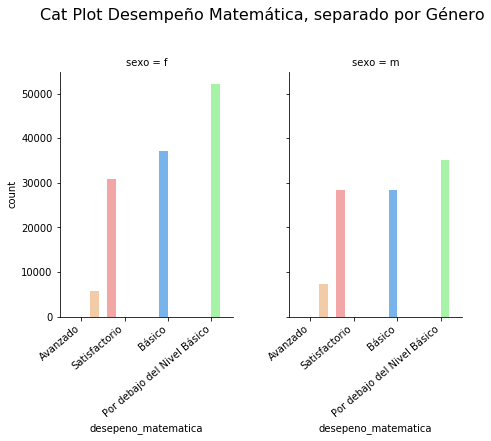

In [92]:
def fig_plot_catplot(df, column, hue, x_axis, height, aspect, title, order_rows=[]):    
    plt.figure(figsize=(9,7))
    g = sns.catplot(x=x_axis, hue=hue, col=column, data=df, kind="count", 
                    height=height, aspect=aspect, order=order_rows, palette=colors)
    g.set_xticklabels(rotation=40, ha="right")
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(title, fontsize=16)
    plt.show()

fig_plot_catplot(data,"sexo", "desepeno_matematica", "desepeno_matematica", 5, .7, "Cat Plot Desempeño Matemática, separado por Género", order_rows=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])

Cantidad total con nivel_educativo_madre: 252279


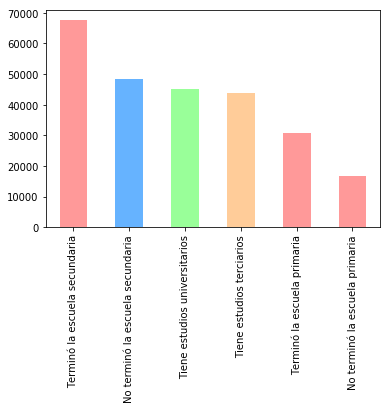

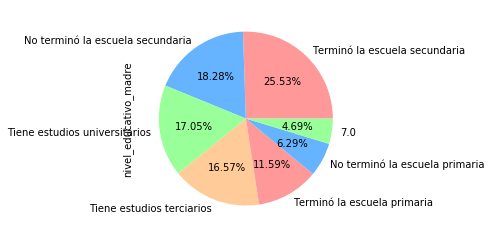

In [93]:
df_con_mat
cant_total_mat=len(df_con_mat)

dfe=df_con_mat.dropna(subset=['nivel_educativo_madre'])
df_con_mat_educativo = dfe.drop(dfe[dfe.nivel_educativo_madre == '7.0'].index)
cant_con_mat_educativo=len(df_con_mat_educativo)

print("Cantidad total con nivel_educativo_madre: {}".format(cant_con_mat_educativo))
df_con_mat_educativo["nivel_educativo_madre"].value_counts().plot.bar(color=colors)
plt.show()
df_con_mat["nivel_educativo_madre"].value_counts().plot.pie(colors=colors, autopct='%.2f%%') #labels=['masculino','femino']
plt.gca().set_aspect("equal")

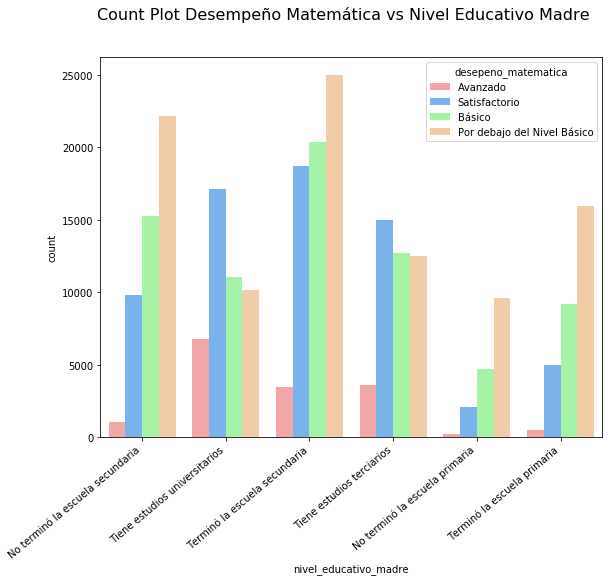

In [103]:
data=df_con_mat_educativo
#print(data.groupby(['desepeno_matematica','nivel_educativo_madre'])['nivel_educativo_madre'].count())
des_mat_ed_madre=data.groupby(['desepeno_matematica','nivel_educativo_madre'])[['desepeno_matematica','nivel_educativo_madre']].count()

count_plot_together(9, 7, "nivel_educativo_madre", "desepeno_matematica", data, title="Count Plot Desempeño Matemática vs Nivel Educativo Madre", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


In [115]:
def drop_nan_of(variable): # variable es "nivel_educativo_madre", etc!
    dfe=df_con_mat.dropna(subset=[variable])
    if(variable=="nivel_educativo_padre"):
        dfe = dfe.drop(dfe[dfe.nivel_educativo_padre == '7.0'].index)
    cant_not_nan=len(dfe)

    print("Cantidad total con {0}: {1}".format(variable, cant_not_nan))
    df_con_mat_educativo[variable].value_counts().plot.bar(color=colors)
    plt.show()
    df_con_mat[variable].value_counts().plot.pie(colors=colors, autopct='%.2f%%') #labels=['masculino','femino']
    plt.gca().set_aspect("equal")
    return dfe
    

Cantidad total con nivel_educativo_padre: 226014


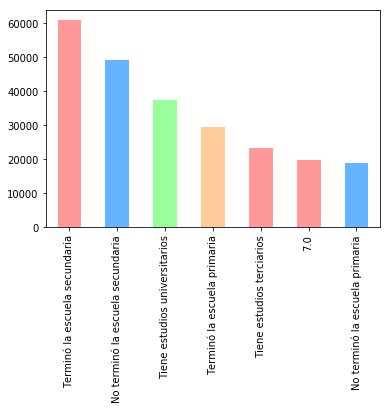

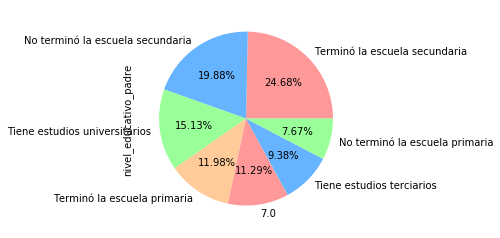

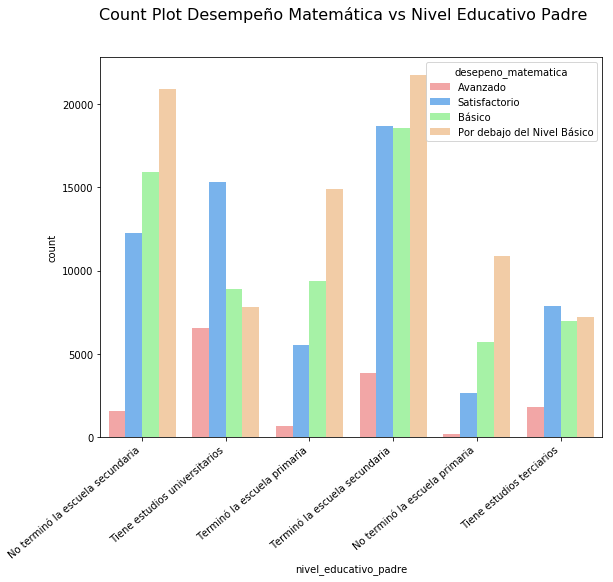

In [116]:
dp=drop_nan_of("nivel_educativo_padre")
count_plot_together(9, 7, "nivel_educativo_padre", "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Nivel Educativo Padre", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    

Cantidad total con indice_socioeconomico_alumno: 259647


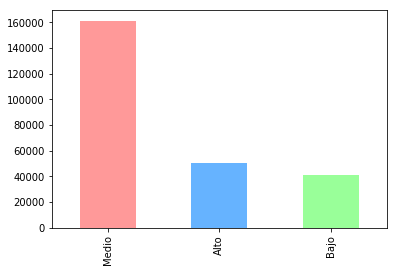

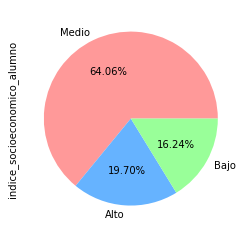

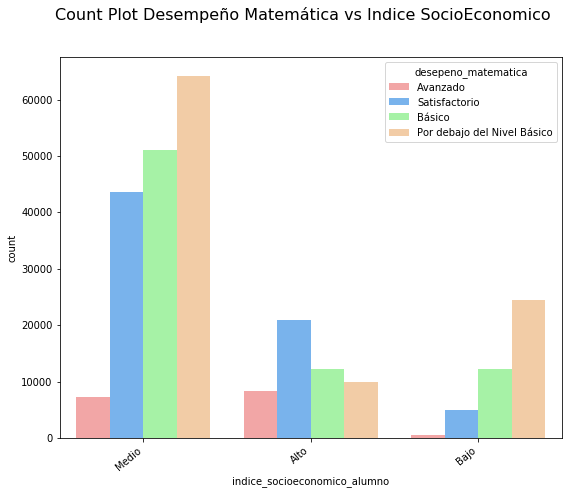

In [117]:
dp=drop_nan_of("indice_socioeconomico_alumno")
count_plot_together(9, 7, "indice_socioeconomico_alumno", "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Indice SocioEconomico", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


Cantidad total con repitencia_primaria: 267099


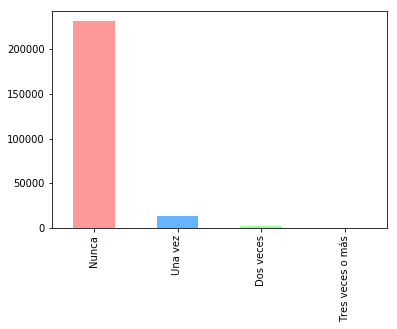

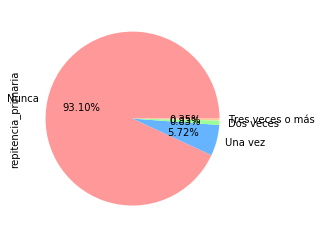

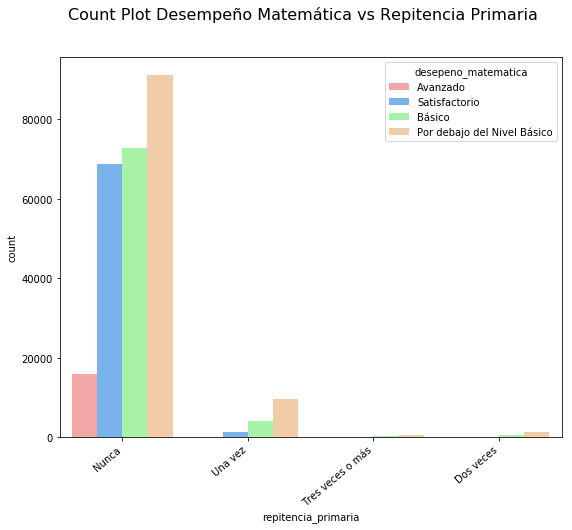

In [118]:
feature="repitencia_primaria"
dp=drop_nan_of(feature)
count_plot_together(9, 7,feature, "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Repitencia Primaria", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


Cantidad total con repitencia_secundaria: 266689


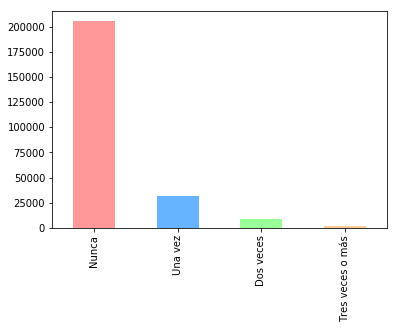

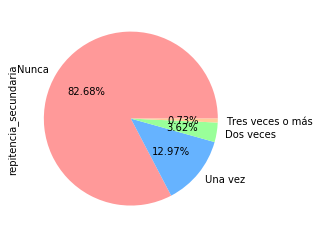

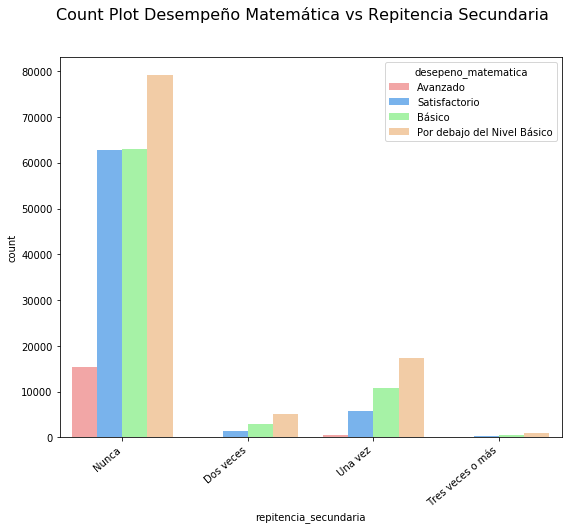

In [119]:
feature="repitencia_secundaria"
dp=drop_nan_of(feature)
count_plot_together(9, 7,feature, "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Repitencia Secundaria", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


Cantidad total con desepeno_lengua: 224558


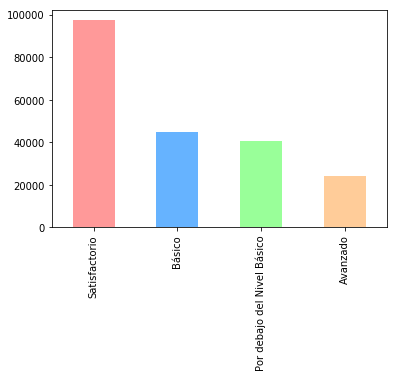

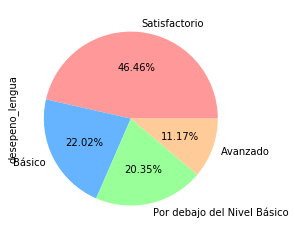

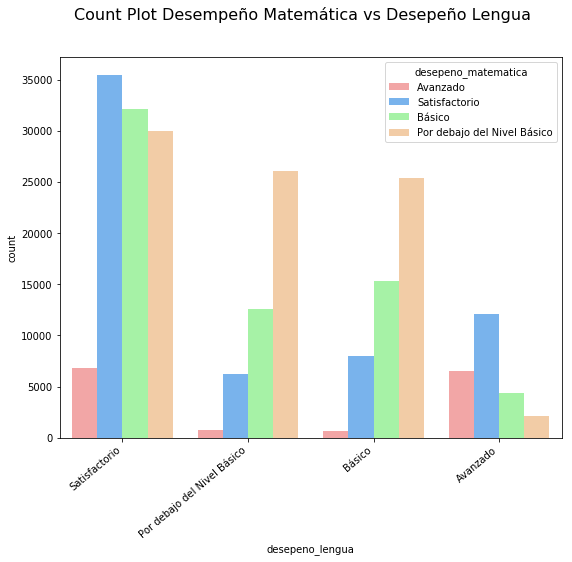

In [120]:
feature="desepeno_lengua"
dp=drop_nan_of(feature)
count_plot_together(9, 7,feature, "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Desepeño Lengua", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


In [126]:
df_not_nans=dp.dropna() 
df_not_nans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156991 entries, 20 to 331851
Data columns (total 15 columns):
id_unidad_educativa              156991 non-null int64
sexo                             156991 non-null object
indice_socioeconomico_alumno     156991 non-null object
nivel_educativo_madre            156991 non-null object
nivel_educativo_padre            156991 non-null object
repitencia_primaria              156991 non-null object
repitencia_secundaria            156991 non-null object
desepeno_lengua                  156991 non-null object
desepeno_matematica              156991 non-null object
desepeno_ciencias_sociales       156991 non-null object
desepeno_ciencias_naturales      156991 non-null object
ponderador_lengua                156991 non-null float64
ponderador_matematica            156991 non-null float64
ponderador_ciencias_sociales     156991 non-null float64
ponderador_ciencias_naturales    156991 non-null float64
dtypes: float64(4), int64(1), object(10)
memo

In [132]:
#Converting to continuos/numerical values
from sklearn.preprocessing import LabelBinarizer
import sys

char_cols = df_not_nans.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df_not_nans[c],label_mapping[c] = pd.factorize(df_not_nans[c])

In [133]:
df_not_nans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156991 entries, 20 to 331851
Data columns (total 15 columns):
id_unidad_educativa              156991 non-null int64
sexo                             156991 non-null int64
indice_socioeconomico_alumno     156991 non-null int64
nivel_educativo_madre            156991 non-null int64
nivel_educativo_padre            156991 non-null int64
repitencia_primaria              156991 non-null int64
repitencia_secundaria            156991 non-null int64
desepeno_lengua                  156991 non-null int64
desepeno_matematica              156991 non-null int64
desepeno_ciencias_sociales       156991 non-null int64
desepeno_ciencias_naturales      156991 non-null int64
ponderador_lengua                156991 non-null float64
ponderador_matematica            156991 non-null float64
ponderador_ciencias_sociales     156991 non-null float64
ponderador_ciencias_naturales    156991 non-null float64
dtypes: float64(4), int64(11)
memory usage: 19.2 MB


In [143]:
#df_not_nans.drop(columns=['ponderador_matematica', 'ponderador_ciencias_sociales', 'ponderador_ciencias_sociales','ponderador_lengua','ponderador_ciencias_naturales'], inplace=True)

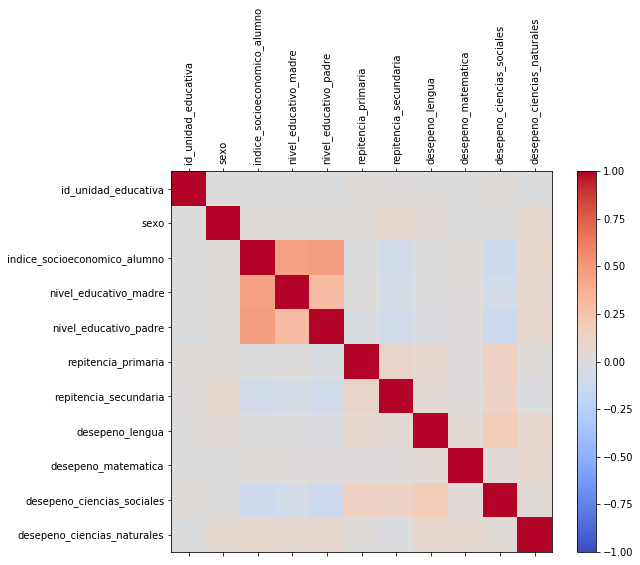

In [145]:
corr = df_not_nans.corr()
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_not_nans.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_not_nans.columns)
ax.set_yticklabels(df_not_nans.columns)
plt.show()